Epoch 0, Loss: 0.244112
Epoch 1000, Loss: 0.091704
Epoch 2000, Loss: 0.088785
Epoch 3000, Loss: 0.087269
Epoch 4000, Loss: 0.086821
Epoch 5000, Loss: 0.087398
Epoch 6000, Loss: 0.087910
Epoch 7000, Loss: 0.086845
Epoch 8000, Loss: 0.085323
Epoch 9000, Loss: 0.080814


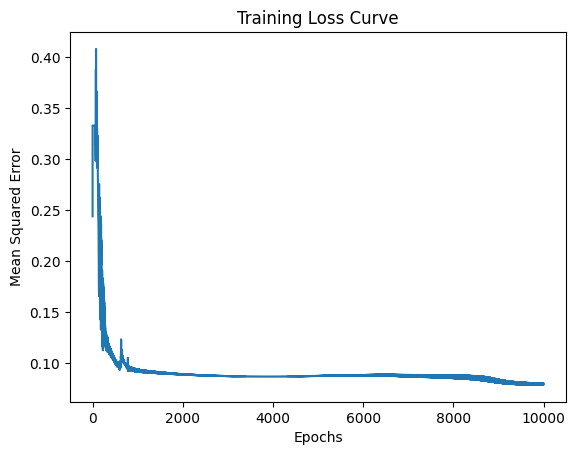

Training Accuracy: 86.20%


In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Load Dataset ===
df = pd.read_csv("/content/three_class_data_integer.csv")

# Assume last column is target
X = df.iloc[:, :-1].values.astype(float)
y = df.iloc[:, -1].values.astype(int)

# Normalize inputs
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-8)

# One-hot encode target (for 3-class classification)
num_classes = len(np.unique(y))
Y = np.zeros((y.size, num_classes))
Y[np.arange(y.size), y] = 1  # one-hot encoding

# === Define Neural Network ===
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.2):
        self.learning_rate = learning_rate
        # Initialize weights with small random values
        self.W_HI = np.random.randn(input_size, hidden_size) * 0.1
        self.W_OH = np.random.randn(hidden_size, output_size) * 0.1

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.W_OH)
        self.output_output = self.sigmoid(self.output_input)
        return self.output_output

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = np.dot(output_delta, self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_OH += np.dot(self.hidden_output.T, output_delta)
        self.W_HI += np.dot(X.T, hidden_delta)

    def train(self, X, Y, epochs=10000):
        errors = []
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = np.mean(np.square(Y - pred))
            errors.append(loss)
            if i % 1000 == 0:
                print(f"Epoch {i}, Loss: {loss:.6f}")
        return errors

# === Initialize and Train ===
input_size = X.shape[1]
hidden_size = 10
output_size = num_classes

NN = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.2)
errors = NN.train(X, Y, epochs=10000)

# === Plot Training Loss ===
plt.plot(errors)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

# === Evaluate on same data ===
preds = NN.feedForward(X)
predicted_classes = np.argmax(preds, axis=1)
accuracy = np.mean(predicted_classes == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")
